# Land use EDA: making a world map🗺️


###  ABOUT DATASET


Get ready to dive into the captivating world of land use! Our dataset ranks countries based on their cultivated land area, encompassing arable land, permanent crops, and other lands. Discover the secrets behind each category and explore the diverse landscapes that shape our planet.

Table of Contents:

01. Rank of Country
02. Country Name
03. Cultivated Land Area (km2)
04. Cultivated Land Area (%)
05. Arable Land (km2)
06. Arable Land (%)
07. Permanent Crops (km2)
08. Permanent Crops (%)
09. Other Land (km2)
10. Other Land (%)
11. Total Area (km2)
12. Date

Embark on a thrilling journey through the rankings to uncover which countries claim the top spots in terms of total cultivated land area. Delve into the realms of arable land, where crops like wheat, maize, and rice flourish. Witness the beauty of permanent crops, including citrus groves, coffee plantations, and more.

But there's more to explore! Venture into the captivating expanse of other lands, from meadows and forests to built-up areas and barren stretches. Our dataset provides percentages for arable land, permanent crops, and other lands, sourced from the reliable CIA World Factbook.

Prepare to be captivated by the fascinating world of land use. Let the data be your guide as you unravel patterns, correlations, and intriguing stories within each entry. The table of contents will lead you on an exciting exploration, revealing the captivating tales hidden within the realm of land use.






In [2]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sn
import geopandas as gpd


In [3]:
# load datasets
land_use = pd.read_csv("/content/Land use Statistics by Country.csv")


In [4]:
land_use.head(3)


,Unnamed: 0,Rank,Country,Cultivated land (km2),Cultivated land (%),Arable land (km2),Arable land (%),Permanent crops (km2),Permanent crops (%),Other lands (km2),Other lands (%),Total area (km2),Date
0,0,,World,17235800,11.6,15827534,10.7,1549600,1.0,131.701.100,88.4,149000000.0,2011
1,1,1,India,1765260,53.7,1656780,50.4,108479,3.3,1522002,46.3,3287263.0,2020
2,2,2,United States,1681826,17.1,1652028,16.8,29798,0.3,8151691,82.9,9833517.0,2020


In [5]:
land_use["Date"].unique()


array([2011, 2020, 2016, 2005, 2002])

 The above code is to display the unique dates found in the "Date" column of the land_use dataset. This information allows for further analysis or insights regarding the temporal aspect of the data and its implications for studying land use patterns.

In [6]:
land_use["Country"].value_counts()


World                  1
Trinidad and Tobago    1
Vanuatu                1
Cyprus                 1
Bhutan                 1
                      ..
Sri Lanka              1
Lithuania              1
Azerbaijan             1
Moldova                1
Vatican City           1
Name: Country, Length: 237, dtype: int64

The above code is to provide the count of occurrences for each unique country in the "Country" column of the land_use dataset, offering insights into the distribution and representation of countries within the dataset.






# World Maps

To plot world maps, the geopandas package is utilized. The process involves downloading the base world map and merging it with our data to generate the final plot.

In [7]:
# Download base world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge our dataset with the base world map
land_use_geo = world.merge(land_use, left_on="name", right_on="Country", how="left")
glu = gpd.GeoDataFrame(land_use_geo)

<ipython-input-7-9efd9370b51c>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


Now that we have our land_use dataset, we are equipped with the crucial geometry information necessary to effortlessly plot it on a map. Let's bring our data to life by unleashing its spatial dimensions and visually exploring the fascinating world of land use.

In [8]:
glu.head(2)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Unnamed: 0,Rank,Country,Cultivated land (km2),Cultivated land (%),Arable land (km2),Arable land (%),Permanent crops (km2),Permanent crops (%),Other lands (km2),Other lands (%),Total area (km2),Date
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",141.0,142,Fiji,2507.0,13.7,1647.0,9.0,860.0,4.7,15767,86.3,18274.0,2011.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",22.0,22,Tanzania,157252.0,16.6,142763.0,15.0,21788.0,2.3,790048,83.4,947300.0,2011.0


In [9]:
# With the goal of creating a cleaner and focused plot, we can remove Antarctica from our dataset using the following code:

glu = glu[glu["continent"] != 'Antarctica']


Now, we are ready to visualize the specific aspects of land use that have piqued our interest. Let's unveil the captivating patterns and spatial distribution of:

1. Arable land
2. Cultivated land
3. Permanent crops


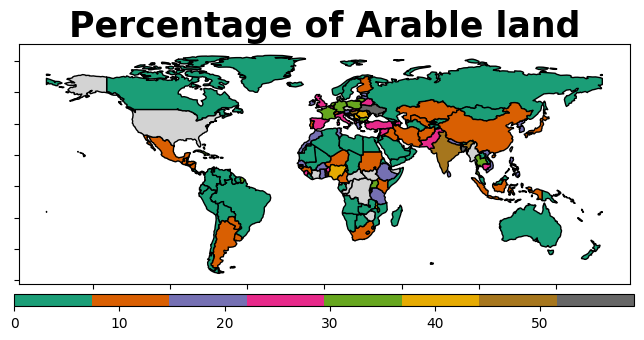

<Figure size 1600x600 with 0 Axes>

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

plt.figure(figsize=(16, 6))
glu.plot(column="Arable land (%)",
         edgecolor="black",
         cmap="Dark2",
         missing_kwds={"color": "lightgrey"},
         ax=ax,
         legend=True,
         cax=cax,
         legend_kwds={"orientation": "horizontal"})

ax.set_yticklabels([])
ax.set_title("Percentage of Arable land", fontname="Times New Roman", size=25, fontweight="bold")
plt.show()

Explore the above captivating visualization to gain insights into the spatial distribution and variations of arable land across regions.


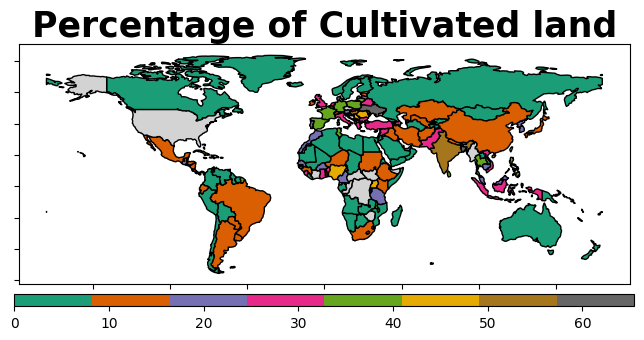

<Figure size 1600x600 with 0 Axes>

In [12]:
# To create an visually appealing and concise visualization for the percentage of cultivated land, we can use the following code:

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

plt.figure(figsize=(16, 6))
glu.plot(column="Cultivated land (%)",
         edgecolor="black",
         cmap="Dark2",
         missing_kwds={"color": "lightgrey"},
         ax=ax,
         legend=True,
         cax=cax,
         legend_kwds={"orientation": "horizontal"})

ax.set_yticklabels([])
ax.set_title("Percentage of Cultivated land", fontname="Times New Roman", size=25, fontweight="bold")
plt.show()

The above title emphasizes the main aspect being visualized, highlighting the percentage of cultivated land. Dive into this captivating visualization to gain insights into the spatial distribution and variations of cultivated land across regions.

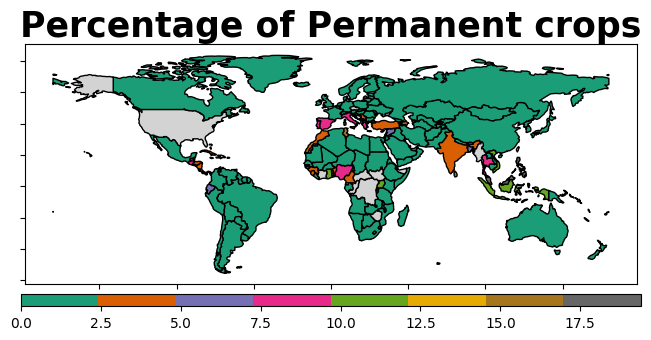

<Figure size 1600x600 with 0 Axes>

In [13]:
# To create an visually engaging and concise visualization for the percentage of permanent crops, we can use the following code:

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

plt.figure(figsize=(16, 6))
glu.plot(column="Permanent crops (%)",
         edgecolor="black",
         cmap="Dark2",
         missing_kwds={"color": "lightgrey"},
         ax=ax,
         legend=True,
         cax=cax,
         legend_kwds={"orientation": "horizontal"})

ax.set_yticklabels([])
ax.set_title("Percentage of Permanent crops", fontname="Times New Roman", size=25, fontweight="bold")
plt.show()

The above title emphasizes the main aspect being visualized, showcasing the percentage of permanent crops. Immerse yourself in this captivating visualization to gain insights into the spatial distribution and variations of permanent crops across regions.

# Correlation: Population-Land Use

Now, let's delve into the fascinating relationship between land use and population by examining the correlation between cultivated land, arable land, permanent crops, and population. Thanks to the merging of our dataset with the geopandas world map, we also have access to population data.

To ensure the accuracy of our analysis, we begin by dropping any missing values in the dataset. This allows us to work with a robust and complete set of data, providing a more accurate representation of the correlation between land use and population.

In [14]:
glu= glu[["pop_est","Cultivated land (%)","Arable land (%)","Permanent crops (%)"]].dropna()


The above code filters the dataset, ensuring that we only consider the selected columns for analysis and removing any incomplete data points. By doing so, we obtain a refined dataset that is suitable for exploring the correlation between population and land use variables, specifically cultivated land, arable land, and permanent crops.

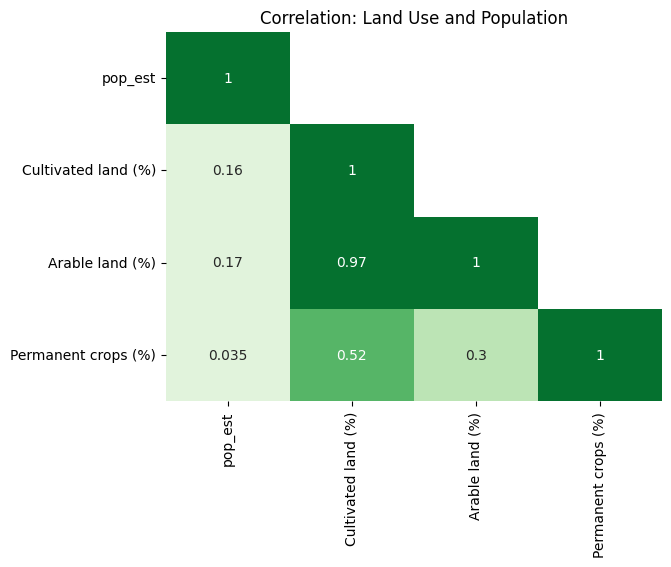

In [15]:
# Make correlation matrix
corr_matrix = glu[["pop_est", "Cultivated land (%)", "Arable land (%)", "Permanent crops (%)"]].corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask[0,0] = False  # Exclude the diagonal element
mask[1,1] = False
mask[2,2] = False
mask[3,3] = False

# Set up the green color palette
cmap = sn.color_palette("Greens")

# Plot the heatmap
sn.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, cbar=False)

# Set the title
plt.title("Correlation: Land Use and Population")

# Show the plot
plt.show()

This captivating exploration reveals the complex relationship between land use and population, highlighting the dominance of arable land in cultivating the vast fields of crops. It reminds us that within the realm of data, hidden narratives and patterns can surprise us, offering new perspectives and insights into the fascinating world we inhabit.